<a href="https://colab.research.google.com/github/rajeevfromkrec/computer-vision/blob/master/Project2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
!git clone https://github.com/satinder147/Attendance-using-Face.git

Cloning into 'Attendance-using-Face'...
remote: Enumerating objects: 85, done.
remote: Total 85 (delta 0), reused 0 (delta 0), pack-reused 85
Unpacking objects: 100% (85/85), done.


In [3]:
!ls

 Attendance-using-Face			      sample_data
'open?id=1pwQ3H4aJ8a6yyJHZkTwtjcL4wYWQb7bn'


In [4]:
import os

In [5]:
os.listdir('Attendance-using-Face')

['recognizer.py',
 'README.md',
 'trainer.py',
 '.git',
 'faces.xml',
 'modelArch.py',
 'embedding.py',
 'facenet_keras.h5',
 'requirements_cpu.txt',
 'Generating_training_data.py',
 'requirements_gpu.txt',
 'retreive_pymongo_data.py',
 '_config.yml',
 'face_detection.py',
 'LICENSE',
 'shape_predictor_68_face_landmarks.dat',
 'align.py',
 'attendance.csv']

In [6]:
!cp ./Attendance-using-Face/facenet_keras.h5 ./facenet_keras.h5

In [7]:
!ls

 Attendance-using-Face	'open?id=1pwQ3H4aJ8a6yyJHZkTwtjcL4wYWQb7bn'
 facenet_keras.h5	 sample_data


In [8]:
from keras.models import load_model
model=load_model('facenet_keras.h5')
print(model.inputs)
print(model.outputs)

Using TensorFlow backend.


[<tf.Tensor 'input_1:0' shape=(None, 160, 160, 3) dtype=float32>]
[<tf.Tensor 'Bottleneck_BatchNorm/cond/Identity:0' shape=(None, 128) dtype=float32>]


/usr/local/lib/python3.6/dist-packages/keras/engine/saving.py:341: UserWarning: No training configuration found in save file: the model was *not* compiled. Compile it manually.
  warnings.warn('No training configuration found in save file: '


In [9]:
!pip install mtcnn
!pip install PIL

     |████████████████████████████████| 2.3MB 2.8MB/s 
ERROR: Could not find a version that satisfies the requirement PIL (from versions: none)
ERROR: No matching distribution found for PIL


In [10]:
import mtcnn


In [11]:
print(mtcnn.__version__)


0.1.0


In [12]:
import sys
print(sys.version)

3.6.9 (default, Apr 18 2020, 01:56:04) 
[GCC 8.4.0]


In [33]:
import PIL
from PIL import Image
from numpy import asarray
from mtcnn.mtcnn import MTCNN
from matplotlib import pyplot

In [34]:
def extract_face(filename, required_size=(160,160)):
  image=Image.open(filename)
  image=image.convert('RGB')
  pixels=asarray(image)
  detector= MTCNN()
  results =detector.detect_faces(pixels)
  x1,y1,width, height= results[0]['box']
  x1,y1= abs(x1),abs(y1)
  x2, y2= x1+width , y1+height
  face= pixels[y1:y2, x1:x2]
  image= Image.fromarray(face)
  image=image.resize(required_size)
  face_array=asarray(image)
  return face_array

1 (160, 160, 3)
2 (160, 160, 3)
3 (160, 160, 3)
4 (160, 160, 3)
5 (160, 160, 3)
6 (160, 160, 3)
7 (160, 160, 3)
8 (160, 160, 3)
9 (160, 160, 3)
10 (160, 160, 3)
11 (160, 160, 3)
12 (160, 160, 3)
13 (160, 160, 3)
14 (160, 160, 3)


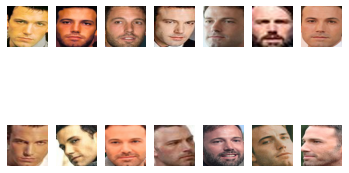

In [17]:

!pip install kaggle

In [18]:
!mkdir .kaggle

In [19]:
import json
token = {"username":"rajeevranjankrec","key":"5e8e081c0d2d711641f31c7629e1f703"}
with open('/content/.kaggle/kaggle.json', 'w') as file:
    json.dump(token, file)

In [21]:

!cp /content/.kaggle/kaggle.json ~/.kaggle/kaggle.json

!kaggle config set -n path -v{/content}
!chmod 600 /root/.kaggle/kaggle.json
!kaggle datasets list

- path is now set to: {/content}
ref                                                           title                                                size  lastUpdated          downloadCount  
------------------------------------------------------------  --------------------------------------------------  -----  -------------------  -------------  
allen-institute-for-ai/CORD-19-research-challenge             COVID-19 Open Research Dataset Challenge (CORD-19)    3GB  2020-07-06 18:49:31          86921  
roche-data-science-coalition/uncover                          UNCOVER COVID-19 Challenge                          179MB  2020-05-21 18:57:53          15197  
oleksastepaniuk/prozorro-public-procurement-dataset           ProZorro. Ukrainian public procurement dataset      448MB  2020-04-15 17:09:37             25  
imdevskp/cholera-dataset                                      Cholera Dataset                                      21KB  2020-07-01 17:28:18            156  
imdevskp/malaria-da

In [22]:
!kaggle datasets download -d dansbecker/5-celebrity-faces-dataset -p /content

  0% 0.00/5.03M [00:00<?, ?B/s]
100% 5.03M/5.03M [00:00<00:00, 83.4MB/s]


In [24]:
!ls


 5-celebrity-faces-dataset.zip	'open?id=1pwQ3H4aJ8a6yyJHZkTwtjcL4wYWQb7bn'
 Attendance-using-Face		 sample_data
 facenet_keras.h5


In [26]:
import zipfile

zfile = zipfile.ZipFile('5-celebrity-faces-dataset.zip')
zfile.extractall('/content/5-celebrity-faces-dataset')

In [27]:
!ls

 5-celebrity-faces-dataset	'open?id=1pwQ3H4aJ8a6yyJHZkTwtjcL4wYWQb7bn'
 5-celebrity-faces-dataset.zip	 sample_data
 Attendance-using-Face		 train
 data				 val
 facenet_keras.h5


1 (160, 160, 3)
2 (160, 160, 3)
3 (160, 160, 3)
4 (160, 160, 3)
5 (160, 160, 3)
6 (160, 160, 3)
7 (160, 160, 3)
8 (160, 160, 3)
9 (160, 160, 3)
10 (160, 160, 3)
11 (160, 160, 3)
12 (160, 160, 3)
13 (160, 160, 3)
14 (160, 160, 3)


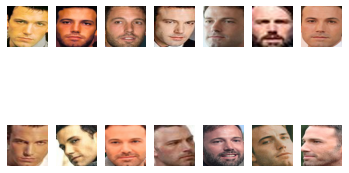

In [36]:
folder = '5-celebrity-faces-dataset/train/ben_afflek/'
i = 1
# enumerate files
for filename in os.listdir(folder):
	# path
	path = folder + filename
	# get face
	face = extract_face(path)
	print(i, face.shape)
	# plot
	pyplot.subplot(2, 7, i)
	pyplot.axis('off')
	pyplot.imshow(face)
	i += 1
pyplot.show()

In [39]:
def load_faces(directory):
  faces=list()
  for filename in os.listdir(directory):
    path=directory+filename
    face= extract_face(path)
    faces.append(face)
  return faces

The load_dataset() function below takes a directory name such as ‘5-celebrity-faces-dataset/train/‘ and detects faces for each subdirectory (celebrity), assigning labels to each detected face


In [44]:
def load_dataset(directory):
  X,y =[],[]
  for subdir in os.listdir(directory):
    path=directory+subdir+'/'
    if not os.path.isdir(path):
      continue
    faces=load_faces(path)
    labels=[subdir for _ in range(len(faces))]
    print('>loaded %d examples for class: %s' % (len(faces), subdir))
    X.extend(faces)
    y.extend(labels)
  return asarray(X), asarray(y)




In [45]:
trainX, trainy=load_dataset('5-celebrity-faces-dataset/train/')

>loaded 19 examples for class: madonna
>loaded 14 examples for class: ben_afflek
>loaded 22 examples for class: mindy_kaling
>loaded 17 examples for class: elton_john
>loaded 21 examples for class: jerry_seinfeld


In [46]:
print(trainX.shape, trainy.shape)

(93, 160, 160, 3) (93,)


In [48]:
from numpy import savez_compressed
testX, testy = load_dataset('5-celebrity-faces-dataset/val/')
print(testX.shape, testy.shape)
# save arrays to one file in compressed format
savez_compressed('5-celebrity-faces-dataset.npz', trainX, trainy, testX, testy)

>loaded 5 examples for class: madonna
>loaded 5 examples for class: ben_afflek
>loaded 5 examples for class: mindy_kaling
>loaded 5 examples for class: elton_john
>loaded 5 examples for class: jerry_seinfeld
(25, 160, 160, 3) (25,)
